In [1]:
#Aufgabe 0
#Hier werden die Daten untersucht, bereinigt und aufbereitet und anschließend als eine csv gespeichert.

In [2]:
#libary Imports

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Hier werden die Daten eingelesen

BesucherDF = pd.read_csv('data/besucher.csv', delimiter=';', decimal=',')
KundenDF = pd.read_csv('data/kunden.csv', delimiter=';', decimal='.')
GeoDF = pd.read_csv('data/geo.txt', delimiter= '\t')

In [4]:
#Zunächst wird getestet, ob die Daten korrekt eingelesen wurden (In Bezug auf den Datentyp).

In [5]:
BesucherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Alter       891 non-null    int64  
 1   Einkommen   891 non-null    float64
 2   Geschlecht  891 non-null    int64  
 3   Zeit        891 non-null    float64
 4   KundeNr     891 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [6]:
KundenDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Alter       1104 non-null   int64  
 1   Einkommen   1104 non-null   float64
 2   Preis       1104 non-null   float64
 3   Geschlecht  1099 non-null   float64
 4   Zeit        1104 non-null   float64
 5   KundeNr     1104 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 51.9+ KB


In [7]:
GeoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   KundeNr        1995 non-null   object
 1   Niederlassung  1995 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB


In [8]:
# 1. Es fällt auf, dass das Geschlecht einmal als int und einmal als float erkannt wurde.
# => Wird am Schluss zu Int geändert.

# 2. Es fällt auf, dass die Niederlassung als object erkannt wurde. Dies deuted daraufhin, dass es unter den Zellen unterschiedliche
#   Datentypen geben könnte. Des Weiteren sollte aus performance Gründen der Datentyp zu String geändert werden, auch weil es am 
#   besten geeignet ist.
# => Die Zellen werden später genauer untersucht und der Datentyp wird am Schluss zu String geändert.

# Alle anderen Spalten scheinen soweit in Ordnung zu sein.

In [9]:
#Nachfolgend werden mit der Funktion .describe() weitere statistische Merkmale untersucht

In [10]:
BesucherDF.describe()

,Alter,Einkommen,Geschlecht,Zeit
count,891.000000,891.000000,891.000000,891.000000
mean,49.881033,59367.936188,0.578002,35.166105
std,11.865889,16164.358221,0.494156,10.476802
min,30.000000,10802.033307,0.000000,3.000000
25%,40.000000,47816.611417,0.000000,28.000000
50%,49.000000,59163.823681,1.000000,35.000000
75%,60.000000,71001.378839,1.000000,43.000000
max,70.000000,108569.087021,1.000000,68.000000


In [11]:
KundenDF.describe()

,Alter,Einkommen,Preis,Geschlecht,Zeit
count,1104.000000,1.104000e+03,1104.000000,1099.000000,1104.000000
mean,50.481884,9.644748e+05,88975.198714,0.637853,44.375906
std,12.225059,3.009470e+07,24464.067781,0.480840,10.848040
min,30.000000,-6.284037e+04,21471.650000,0.000000,12.000000
25%,40.000000,4.663850e+04,70609.422500,0.000000,37.000000
50%,51.000000,5.901300e+04,88931.455000,1.000000,44.000000
75%,61.000000,7.029800e+04,107093.375000,1.000000,52.000000
max,120.000000,1.000000e+09,165482.310000,1.000000,80.000000


In [12]:
GeoDF.describe()

,KundeNr,Niederlassung
count,1995,1995
unique,1995,15
top,K0001,Baden-Württemberg
freq,1,382


In [13]:
# 1. Die Tabelle "Besucher" scheint soweit in Ordnung zu sein.

# 2. Bei der Tabelle "Kunden" fällt auf, dass der Höchstwert der Spalte "Alter" zu hoch ist. 
#    Des Weiteren fällt auf, dass es Fehler bei der Spalte "Einkommen" geben muss, weil sowohl Mindest- als auch Höchstwert nicht
#    stimmen können. Ebenfalls wird deutlich, dass es 5 fehlende Werte bei der Spalte "Geschlecht" gibt.
#    Die Spalten "Preis" und "Zeit" scheinen sonst soweit in Ordnung zu sein.
#
# => Die Spalten "Alter" und "Einkommen" müssen genauer untersucht werden. Bei der Spalte "Geschlecht" konnten wir nun feststellen, 
#    welches Verhältsnis der Datensatz aufweist, dh. wie wir mit den fehlenden Werten umgehen sollten.

# 3. Bei der Tabelle "Geo" fällt auf, dass es in der Spalte "Niederlassung! 15 Werte gibt, die unique sind. Das deutet 
#    daraufhin, dass es Eingabefehler gegeben haben könnte.
# => Die Spalte "Niederlassung muss genauer untersucht werden.

In [14]:
#Nachfolgend wird geprüft, ob es weitere fehlende Werte gibt

In [15]:
missing_values_countB = BesucherDF.isnull().sum()
print(missing_values_countB)

Alter         0
Einkommen     0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64


In [16]:
missing_values_countK = KundenDF.isnull().sum()
print(missing_values_countK)

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64


In [17]:
missing_values_countG = GeoDF.isnull().sum()
print(missing_values_countG)

KundeNr          0
Niederlassung    0
dtype: int64


In [18]:
# Es konnte festgestellt werden, dass es tatsächlich nur in der Spalte "Geschlecht" fehlende Werte gibt

In [19]:
# Nachfolgend wird geprüft, wie es bei den Zeilen mit fehlendem Geschlecht, bei den anderen Werten aussieht. 

In [20]:
KundenDF_missing_values = KundenDF[KundenDF.isnull().any(axis=1)]
KundenDF_missing_values

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
110,41,46542.0,63477.00,NaN,40.0,K0024
312,53,49798.0,61329.51,NaN,39.0,K0166
588,64,83452.0,133180.70,NaN,62.0,K0090
612,52,66602.0,98756.07,NaN,45.0,K0325
731,67,91461.0,131748.07,NaN,66.0,K0790


In [21]:
# Es konnte festgestellt werden, dass die anderen Werte innerhalb der Zeile in Ordnung sind. Das heißt, dass wir die 
# fehlenden Werte, um möglichst akkurat zu bleiben, im Verhältnis zwei(0=weiblich) zu drei(1=männlich) ändern. 
# Um es möglichst einfach zu halten, werden die Werte zufällig zugewiesen

In [22]:
# Die fehlenden Werte werden in eine Liste gepackt, gemischt und anschließend eingesetzt
values = [0, 0, 1, 1, 1]
np.random.shuffle(values)
KundenDF.loc[KundenDF_missing_values.index, 'Geschlecht'] = values

In [23]:
# Hier wird getestet, ob das geklappt hat
missing_values_countK = KundenDF.isnull().sum()
print(missing_values_countK)

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64


In [24]:
# Nachfolgend werden die Datensätze auf Ausreißer überprüft 

In [25]:
# Hier werden die Ausreißer in der Tabelle "Besucher" (Spalte "Einkommen") berechnet, gezählt und visualisiert

In [26]:
# Hier werden die Ausreißer von der Tabelle "Besucher" (Spalte Einkommen) berechnet

# Berechnung von Q1 (25. Perzentil), Q3 (75. Perzentil) und IQR 
Q1 = BesucherDF['Einkommen'].quantile(0.25)
Q3 = BesucherDF['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

# Berechnung der Ausreißer-Grenzen
untere_grenze = Q1 - 1.5 * IQR
obere_grenze = Q3 + 1.5 * IQR

# Identifizierung von Ausreißern indem eine neue Spalte erstellt, und der Zustand "true" zugewiesen wird
BesucherDF['Ausreißer'] = (BesucherDF['Einkommen'] < untere_grenze) | (BesucherDF['Einkommen'] > obere_grenze)

In [27]:
#Hier wird die Anzahl der Ausreißer in "Besucher" gezählt
AusreißerEKinBesucher = (BesucherDF['Ausreißer'] == True).sum()
print(f"Es gibt im Datensatz 'Besucher' insgesamt : {AusreißerEKinBesucher} Ausreißer")

Es gibt im Datensatz 'Besucher' insgesamt : 3 Ausreißer


In [28]:
# Nachfolgend werden die Ausreißer in der Tabelle "Besucher" (Spalte "Einkommen") visualisiert

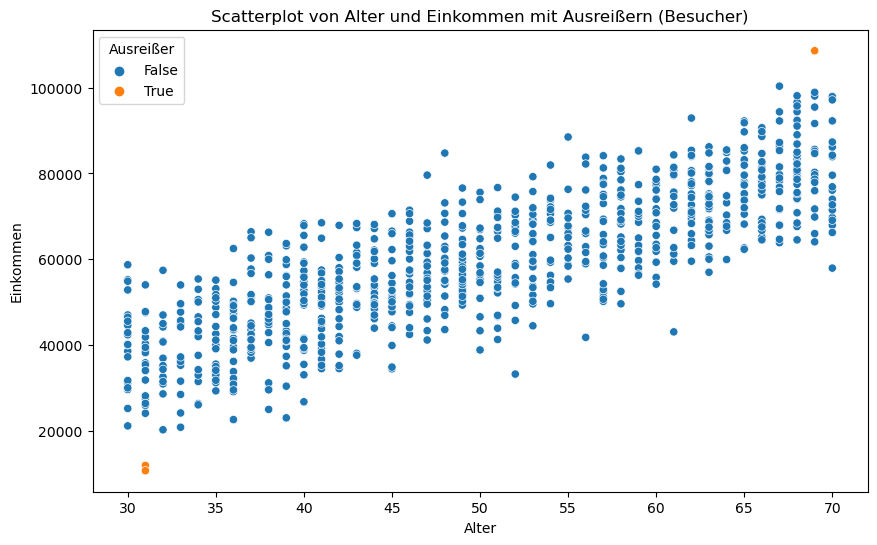

In [29]:
# Hier wird ein Scatterplot erstellt, bei dem alle Ausreißer farblich sichtbar sind.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BesucherDF['Alter'], y=BesucherDF['Einkommen'], hue=BesucherDF['Ausreißer'])
plt.title('Scatterplot von Alter und Einkommen mit Ausreißern (Besucher)')
plt.xlabel('Alter')
plt.ylabel('Einkommen')
plt.legend(title='Ausreißer')
plt.show()

In [30]:
# Hier werden die Ausreißer in der Tabelle "Kunden" (Spalte "Einkommen") berechnet, gezählt und visualisiert

In [31]:
# Hier werden die Ausreißer von der Tabelle "Kunden" (Spalte Einkommen) berechnet

# Berechnung von Q1 (25. Perzentil), Q3 (75. Perzentil) und IQR
Q1 = KundenDF['Einkommen'].quantile(0.25)
Q3 = KundenDF['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

# Berechnung der Ausreißer-Grenzen
untere_grenze = Q1 - 1.5 * IQR
obere_grenze = Q3 + 1.5 * IQR

# Identifizierung von Ausreißern in dem eine neue Spalte erstellt, und der Zustand "true" zugewiesen wird
KundenDF['Ausreißer'] = (KundenDF['Einkommen'] < untere_grenze) | (KundenDF['Einkommen'] > obere_grenze)


In [32]:
#Hier wird die Anzahl der Ausreißer in "Kunden" gezählt
AusreißerEKinKunden = (KundenDF['Ausreißer'] == True).sum()
print(f"Es gibt im Datensatz 'Kunden' insgesamt : {AusreißerEKinKunden} Ausreißer")

Es gibt im Datensatz 'Kunden' insgesamt : 4 Ausreißer


In [33]:
# Nachfolgend werden die Ausreißer in der Tabelle "Kunden" (Spalte "Einkommen") visualisiert

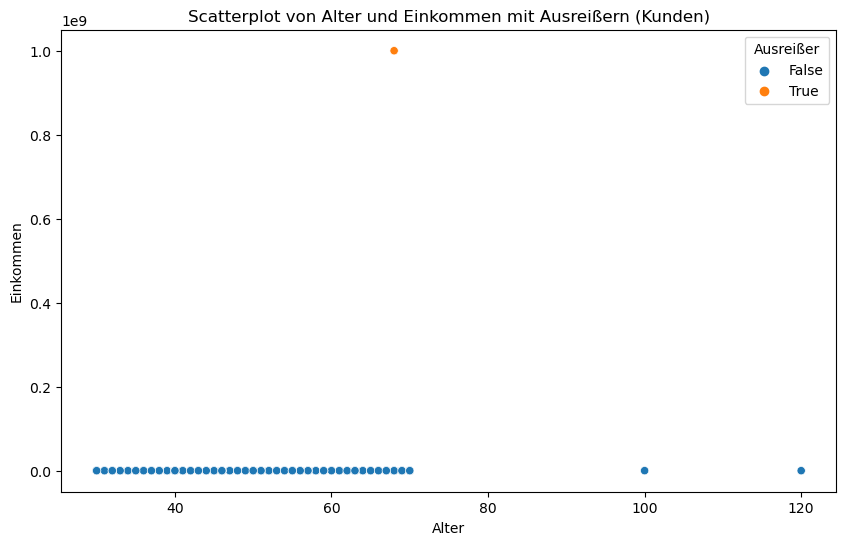

In [34]:
# Hier wird ein Scatterplot erstellt, bei dem alle Ausreißer farblich sichtbar sind.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=KundenDF['Alter'], y=KundenDF['Einkommen'], hue=KundenDF['Ausreißer'])
plt.title('Scatterplot von Alter und Einkommen mit Ausreißern (Kunden)')
plt.xlabel('Alter')
plt.ylabel('Einkommen')
plt.legend(title='Ausreißer')
plt.show()

In [35]:
# Wir konnten feststellen, dass es in der Tabelle "Besucher" drei Ausreißer in der Spalte "Einkommmen" gibt. 
# Wir konnten feststellen, dass es in der Tabelle "Kunden" vier Ausreißer in der Spalte "Einkommmen" gibt. 
# Da es einen sehr sehr hohen Wert in "Kunden" gibt, kann es nicht korrekt visualisiert werden. Des Weiteren fällt auf, 
# dass es falsche Werte für das Alter gibt 

# => Wir ersetzen die Ausreißer (Einkommen) durch den Medianwert und schauen uns die Spalte "Alter" später genauer an.

In [36]:
# Hier wird jeweils der Median der Tabellen "Besucher" & "Einkommen" in eine variable gespeichert
medianwertEKinBesucher = BesucherDF['Einkommen'].median()
medianwertEKinKunden = KundenDF['Einkommen'].median()

In [37]:
# Hier werden die Ausreißer mit der zuvor erstellten Variable, also dem Median, ersetzt
BesucherDF.loc[BesucherDF['Ausreißer'], 'Einkommen'] = medianwertEKinBesucher
KundenDF.loc[KundenDF['Ausreißer'], 'Einkommen'] = medianwertEKinKunden

In [38]:
# Bevor nun die neu erstellte Spalte "Ausreißer" wieder entfernt wird, wird es nochmal visiualisiert, um zu überprüfen ob es geklappt hat

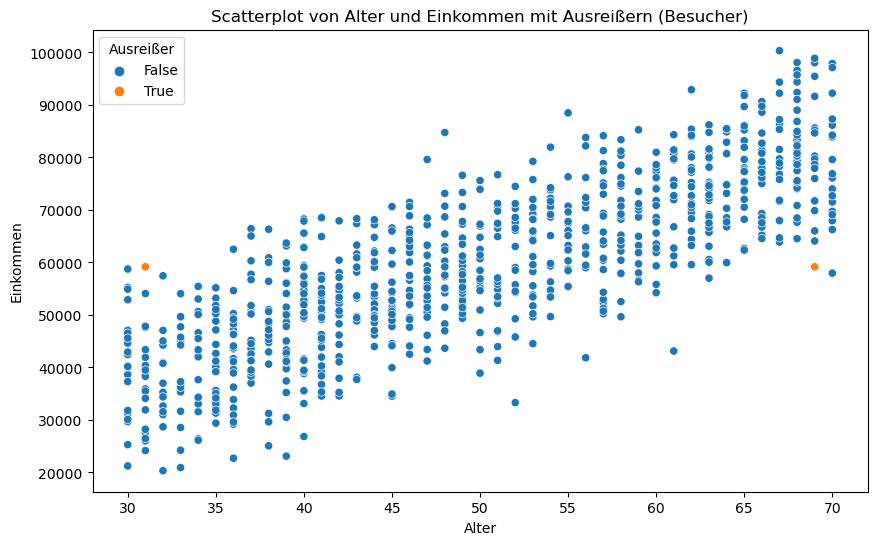

In [39]:
# Hier wird ein Scatterplot erstellt, bei dem alle Ausreißer farblich sichtbar sind.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=BesucherDF['Alter'], y=BesucherDF['Einkommen'], hue=BesucherDF['Ausreißer'])
plt.title('Scatterplot von Alter und Einkommen mit Ausreißern (Besucher)')
plt.xlabel('Alter')
plt.ylabel('Einkommen')
plt.legend(title='Ausreißer')
plt.show()

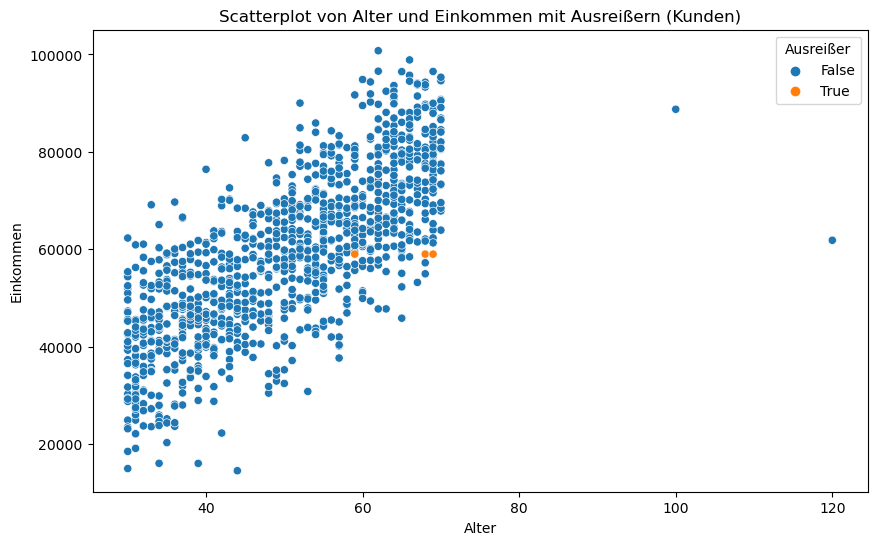

In [40]:
# Hier wird ein Scatterplot erstellt, bei dem alle Ausreißer farblich sichtbar sind.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=KundenDF['Alter'], y=KundenDF['Einkommen'], hue=KundenDF['Ausreißer'])
plt.title('Scatterplot von Alter und Einkommen mit Ausreißern (Kunden)')
plt.xlabel('Alter')
plt.ylabel('Einkommen')
plt.legend(title='Ausreißer')
plt.show()

In [41]:
# Hier kann man sehen, dass es geklappt hat. Hier konnte die Tabelle "Kunden" auch korrekt visualisiert werden.
# Nun kann die Spallte "Ausreißer" auch wieder entfernt

In [42]:
BesucherDF.pop("Ausreißer")
KundenDF.pop("Ausreißer")

0       False
1       False
2       False
3       False
4       False
        ...  
1099    False
1100    False
1101    False
1102    False
1103    False
Name: Ausreißer, Length: 1104, dtype: bool

In [43]:
# Nachfolgend wird die Spalte "Alter" nochmal untersucht

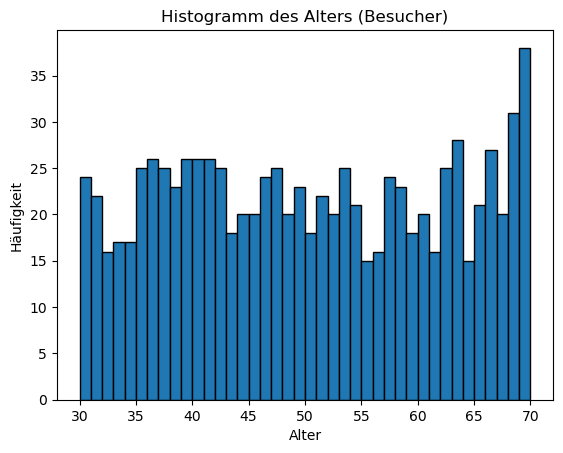

In [44]:
plt.hist(BesucherDF['Alter'], bins=40, edgecolor='black')
plt.title('Histogramm des Alters (Besucher)')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.show()

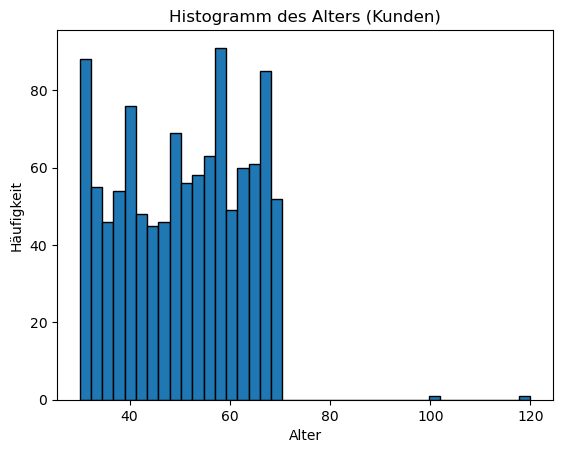

In [45]:
plt.hist(KundenDF['Alter'], bins=40, edgecolor='black')
plt.title('Histogramm des Alters (Kunden)')
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.show()

In [46]:
# Bei der Tabelle "Besucher" gibt es keine weiteren Ausreißer
# Es fällt aber auf, dass es falsche Werte für das Alter in der Tabelle "Kunden" gibt. Alle Werte über 70 sind als Ausreißer zu behandeln.
# => Falsche Werte werden mit dem Modus ersetzt

In [47]:
#Hier wird die Anzahl der falschen Werte gezählt
falschAinKunden = (KundenDF['Alter'] > 70).sum()
print(f"Es gibt im Datensatz 'Kunden' insgesamt : {falschAinKunden} falsche Werte")

Es gibt im Datensatz 'Kunden' insgesamt : 2 falsche Werte


In [48]:
# Es fällt auf, dass es zwei falsche Werte gibt
# => identifizieren und ersetzen durch Modus

In [49]:
# Die Zeilen mit den falschen Werten werden, inkl. Index, in eine Liste gepackt
falsche_werte_index = KundenDF[KundenDF['Alter'] > 70].index

# Der Modus wird mit in eine variable gepackt
modusAlter = KundenDF['Alter'].mode()[0]

# Und hier werden die falschen Werte mit der zuvor erstellten Variable, also dem Modus, ersetzt
KundenDF.loc[falsche_werte_index, 'Alter'] = modusAlter

In [50]:
# Hier wird überprüft, ob das geklappt hat
print(KundenDF.loc[falsche_werte_index])

     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
142     55    88749.0  119134.23         0.0  64.0   K0494
711     55    61857.0  104214.07         1.0  52.0   K0039


In [51]:
# Das Alter wurde erfolgreich mit dem Modus ersetzt

In [52]:
# Nachfolgend wird die Datei Geo untersucht und bearbeitet 

In [53]:
# Hier wird geschaut, welche Werte überhaupt eingegeben wurden
uniqueNL = GeoDF['Niederlassung'].unique()
print(uniqueNL)

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']


In [54]:
# Es fällt auf, dass es Unstimmigkeiten gibt, denn pro Bundesland soll es nur eine Niederlassung geben, die immer gleich lauten muss

In [55]:
# Hier wird eine Liste erstellt um die Fehler zu korrigieren. Alle "falschen" Werte werden der richtigen Niederlassung zugewiesen
korrekturen = {
    
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin',
    'NRW': 'Nordrhein-Westfalen',
 
}

In [56]:
# Hier wird nun die korrigierte Liste eingesetzt
GeoDF['Niederlassung'] = GeoDF['Niederlassung'].replace(korrekturen)

# Hier wird getestet, ob es geklappt hat
print(GeoDF['Niederlassung'].unique())

['Sachsen' 'Nordrhein-Westfalen' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen' 'Hamburg' 'Düsseldorf']


In [57]:
# Nachfolgend werden noch die drei Dataframes zu einer Tabelle zusammengeführt

In [58]:
# Hier werden die Tabellen "Besucher" und "Kunden" zusammgeführt
Kombiniert = pd.merge(BesucherDF[['KundeNr', 'Alter', 'Einkommen', 'Zeit', 'Geschlecht']], 
                     KundenDF[['KundeNr', 'Preis', 'Alter', 'Einkommen', 'Geschlecht', 'Zeit']], 
                     on='KundeNr', 
                     how='outer', 
                     suffixes=('_Besucher', '_Kunden'))

# Kombinieren der Werte für 'Alter', 'Einkommen', 'Zeit' und 'Geschlecht' aus beiden Tabellen, um NaN-Werte zu vermeiden
Kombiniert['Alter'] = Kombiniert['Alter_Besucher'].combine_first(Kombiniert['Alter_Kunden'])
Kombiniert['Einkommen'] = Kombiniert['Einkommen_Besucher'].combine_first(Kombiniert['Einkommen_Kunden'])
Kombiniert['Zeit'] = Kombiniert['Zeit_Besucher'].combine_first(Kombiniert['Zeit_Kunden'])
Kombiniert['Geschlecht'] = Kombiniert['Geschlecht_Besucher'].combine_first(Kombiniert['Geschlecht_Kunden'])

# Entfernen der zusätzlichen Spalten
Kombiniert = Kombiniert.drop(columns=['Alter_Besucher', 'Alter_Kunden', 'Einkommen_Besucher', 'Einkommen_Kunden', 'Zeit_Besucher', 'Zeit_Kunden', 'Geschlecht_Besucher', 'Geschlecht_Kunden'])

# Hinzufügen von GeoDF basierend auf 'KundeNr'
Kuratiert = pd.merge(Kombiniert, GeoDF[['KundeNr', 'Niederlassung']], on='KundeNr', how='outer')

# Endgültige Struktur anpassen
Kuratiert = Kuratiert[['KundeNr', 'Alter', 'Geschlecht', 'Zeit', 'Einkommen', 'Preis', 'Niederlassung']]

In [59]:
# Hier wird der Datentyp von Geschlecht (zu int), Alter (zu int) und Niederlassung (zu String) geändert
Kuratiert['Geschlecht'] = Kuratiert['Geschlecht'].astype(int)
Kuratiert['Alter'] = Kuratiert['Alter'].astype(int)
Kuratiert['Niederlassung'] = Kuratiert['Niederlassung'].astype(pd.StringDtype())

In [60]:
Kuratiert.to_csv('data/Kuratiert.csv', sep = ",", decimal=',', index = False)

In [61]:
Kuratiert

,KundeNr,Alter,Geschlecht,Zeit,Einkommen,Preis,Niederlassung
0,K1814,30,0,29.0,39919.095335,NaN,Bayern
1,K1544,41,0,27.0,53430.673086,NaN,Baden-Württemberg
2,K1945,64,0,32.0,73163.216927,NaN,Baden-Württemberg
3,K1825,41,0,44.0,36761.482581,NaN,Baden-Württemberg
4,K1144,35,1,33.0,42684.331632,NaN,Nordrhein-Westfalen
...,...,...,...,...,...,...,...
1990,K0467,70,1,51.0,69581.000000,103751.58,Thüringen
1991,K0122,38,1,33.0,48301.000000,64230.98,Niedersachsen
1992,K1045,67,1,41.0,63547.000000,103123.57,Berlin
1993,K1096,37,1,36.0,32686.000000,49215.87,Baden-Württemberg
